In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Problem:  Three Factors at 2 Levels:  visualizing interactions and optimizing settings for 2 factors

Example of modeling wire sensitivity as change in Impedance from wire Number of Turns, Wire Winding Distance, and Wire Gauge

example from:  https://www.itl.nist.gov/div898/handbook/pri/section6/pri61.htm 

In [3]:
T=pd.Series([-1,1,-1,1,-1,+1,-1,+1],name="Turns")
W=pd.Series([-1,-1,1,1,-1,-1,1,1],name="WindingDist")
G=pd.Series([-1,-1,-1,-1,1,1,1,1],name="Gauge")
y=pd.Series([1.70,4.57,0.55,3.39,1.51,4.59,0.67,4.29],name="Impedance")

In [4]:
DF_wire=pd.concat([T,W,G,y],axis='columns')
print(DF_wire)

   Turns  WindingDist  Gauge  Impedance
0     -1           -1     -1       1.70
1      1           -1     -1       4.57
2     -1            1     -1       0.55
3      1            1     -1       3.39
4     -1           -1      1       1.51
5      1           -1      1       4.59
6     -1            1      1       0.67
7      1            1      1       4.29


In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_wire=ols('y~T*W*G',data=DF_wire)
results_wire=model_wire.fit()
print(results_wire.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: y                AIC:                -512.8573
Date:               2023-06-26 16:40 BIC:                -512.2218
No. Observations:   8                Log-Likelihood:     264.43   
Df Model:           7                F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
--------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept      2.6587        inf    0.0000     nan      nan      nan
T              1.5513        inf    0.0000     nan      nan      nan
W             -0.4337        inf   -0.0000     nan      nan      nan
T:W            0.0637        inf    0.0000     nan      nan      nan

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


The full model has 3 main effects, 3 2-way interactions, and 1 3-way interaction. 

The model is y ~ 2.66 +1.55T -0.43W +0.11G + interactions

T (Turnings) and W (Windings) have the largest main effects in this full model.  We can directly compare the coefficients here since we are working with the factors coded a -1 and +1 numbers, so we will choose these and re-fit the model using only these effects. 

In [6]:
model_wireTW=ols('y~T*W',data=DF_wire)
results_wireTW=model_wireTW.fit()
print(results_wireTW.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.964   
Dependent Variable: y                AIC:                7.3241  
Date:               2023-06-26 16:40 BIC:                7.6419  
No. Observations:   8                Log-Likelihood:     0.33795 
Df Model:           3                F-statistic:        64.39   
Df Residuals:       4                Prob (F-statistic): 0.000766
R-squared:          0.980            Scale:              0.10761 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.6587    0.1160  22.9240  0.0000   2.3367   2.9808
T              1.5513    0.1160  13.3751  0.0002   1.2292   1.8733
W             -0.4338    0.1160  -3.7398  0.0201  -0.7558  -0.1117
T:W            0.0638    0.1160   0.5497  0.6118  -0.2583   0.3858
--------------------

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Show types of visualization tools to show the effects of Turns and Winding Distance on Wire Impedance

- Could show factor interaction plot
- Contour plot
- Surface Response

<AxesSubplot:xlabel='WindingDist', ylabel='Impedance'>

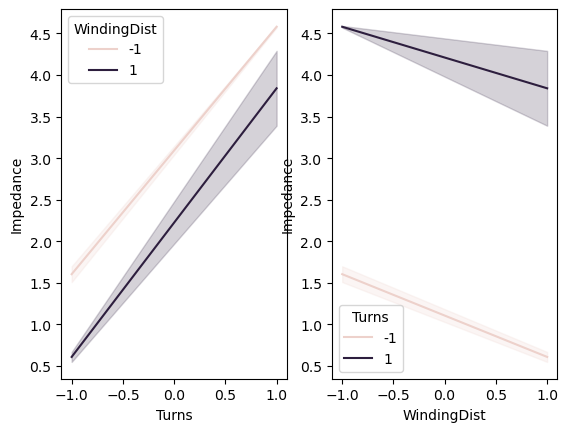

In [7]:
# factorplot, catplot
fig, ax =plt.subplots(1,2,sharex=True)
sns.lineplot(x="Turns",y="Impedance",hue="WindingDist",data=DF_wire,ax=ax[0])
sns.lineplot(x="WindingDist",y="Impedance",hue="Turns",data=DF_wire, ax=ax[1])

Text(0.5, 0.92, 'Surface Plot for Impedance')

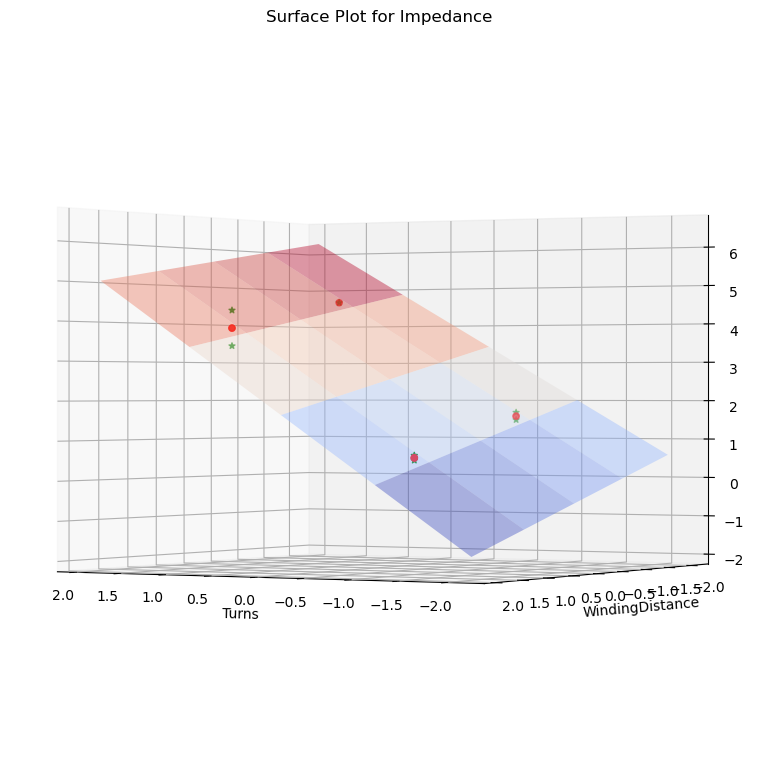

In [8]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DF_wire
x = df["Turns"]
y= df["WindingDist"]
z = df["Impedance"]

x1,x2,x3=model_wireTW.exog_names[1:]

x_surf=np.arange(-2.1,2.1)
y_surf=np.arange(-2.1,2.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_wireTW.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=0,azim=120)

ax.scatter(x.values,y.values,results_wireTW.fittedvalues.values,label="Fited Values",color="r")

plt.xlabel("Turns")
plt.ylabel("WindingDistance")
plt.title("Surface Plot for Impedance")

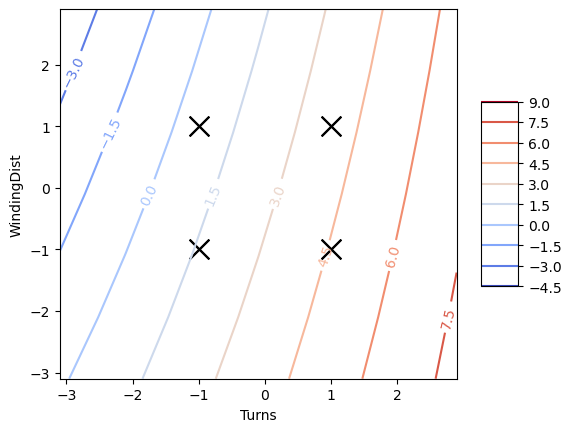

In [9]:
df = DF_wire
x = df["Turns"]
y= df["WindingDist"]
z = df["Impedance"]

x1,x2,x3=model_wireTW.exog_names[1:]

x_surf=np.arange(-3.1,3.1)
y_surf=np.arange(-3.1,3.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_wireTW.predict(exog=exog).values.reshape(xS.shape)

fig, ax = plt.subplots(1, 1)

contour_WT=ax.contour(xS,yS,zS,cmap="coolwarm")
ax.clabel(contour_WT, inline=True, fontsize=10)
fig.colorbar(contour_WT,shrink=0.5,aspect=5)
plt.xlabel("Turns")
plt.ylabel("WindingDist")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

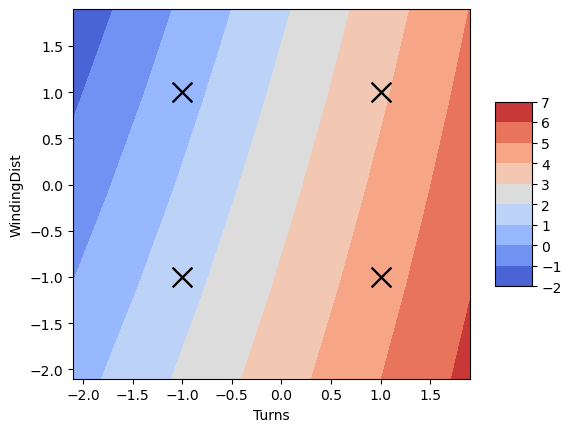

In [10]:
x_surf=np.arange(-2.1,2.1)
y_surf=np.arange(-2.1,2.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_wireTW.predict(exog=exog).values.reshape(xS.shape)

fig, ax = plt.subplots(1, 1)

contour_WT=ax.contourf(xS,yS,zS,cmap="coolwarm")
#ax.clabel(contour_WT, inline=True, fontsize=10)
fig.colorbar(contour_WT,shrink=0.5,aspect=5)
plt.xlabel("Turns")
plt.ylabel("WindingDist")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")